In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder# to convert to 0 and 1
from sklearn.model_selection import train_test_split, cross_val_score# for machine learning 
from sklearn.metrics import roc_curve, auc, confusion_matrix#used for logistic regression
%matplotlib inline

In [9]:
ad_df = pd.read_csv('Advertising.csv', index_col=0)
ad_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


linear regression

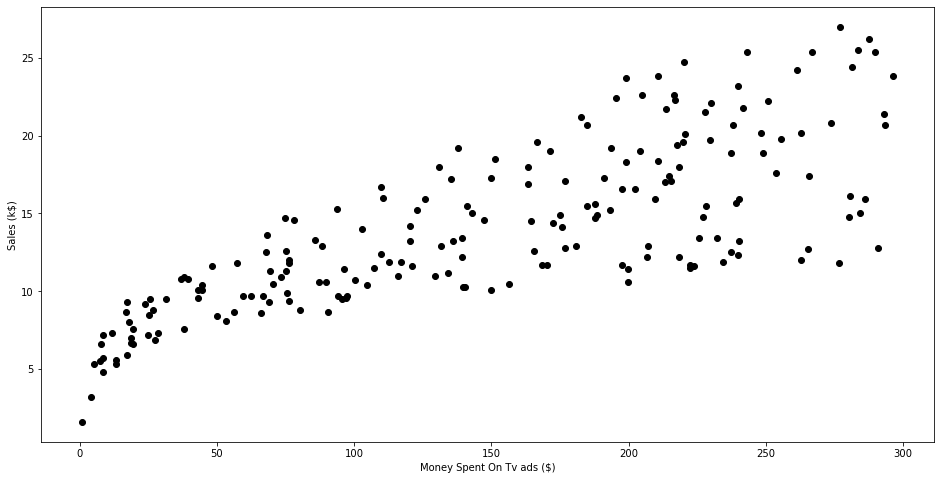

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(ad_df['TV'], ad_df['sales'], c='black')
plt.xlabel('Money Spent On Tv ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [15]:
X = ad_df['TV'].values.reshape(-1, 1)
y = ad_df['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)
print(f" The linear model is: \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

 The linear model is: 
 Y= 7.032593549127693 + 0.047536640433019764*TV


predictions and plot the line

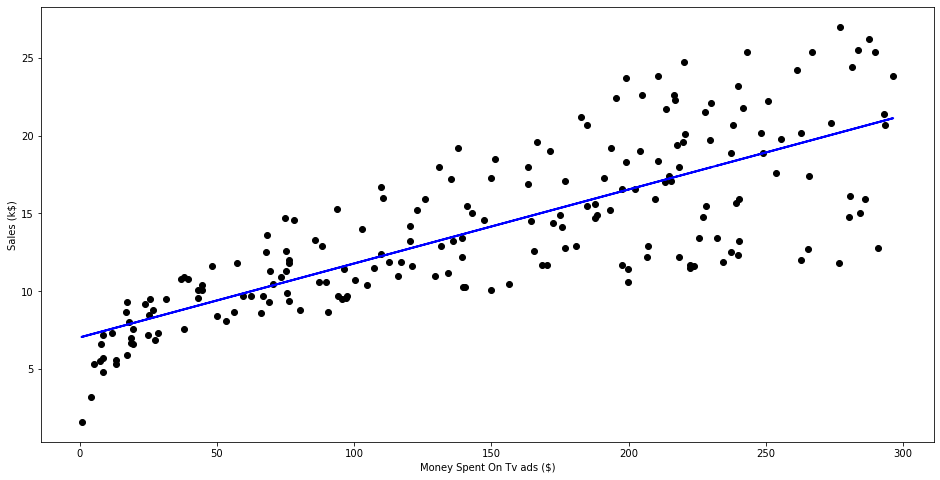

In [17]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel('Money Spent On Tv ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [18]:
# To check the model
X = ad_df['TV']
y = ad_df['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        19:15:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Multiple regression

In [19]:
Xs = ad_df.drop(['sales'], axis=1)
y = ad_df['sales'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(Xs, y)
print(f" The linear model is: \n Y= {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")


 The linear model is: 
 Y= 2.9388893694594067 + 0.04576464545539761*TV + 0.18853001691820462*radio + -0.0010374930424762972*newspaper


In [21]:
#using stacks to check the model
X = np.column_stack((ad_df['TV'], ad_df['radio'], ad_df['newspaper']))
y = ad_df['sales'].values.reshape(-1, 1)
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        19:32:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Classification determines the probability of an observation to be part of a class or not (linear regression)
As X approaches infinity you approach 1 and as X approaches negative infinity you approach zero.
All values are between 0 and 1 one being the likelihood of accuracy.

In [23]:
mush_df = pd.read_csv('mushrooms.csv', index_)
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<AxesSubplot:xlabel='class', ylabel='count'>

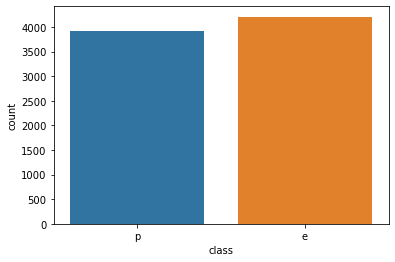

In [27]:
# count plot for the classes.
sns.countplot(x='class', data=mush_df)

In [29]:
#find the nullvalues
for col in mush_df.columns:
    print(f"{col}: {mush_df[col].isnull().sum()}")

class: 0
cap-shape: 0
cap-surface: 0
cap-color: 0
bruises: 0
odor: 0
gill-attachment: 0
gill-spacing: 0
gill-size: 0
gill-color: 0
stalk-shape: 0
stalk-root: 0
stalk-surface-above-ring: 0
stalk-surface-below-ring: 0
stalk-color-above-ring: 0
stalk-color-below-ring: 0
veil-type: 0
veil-color: 0
ring-number: 0
ring-type: 0
spore-print-color: 0
population: 0
habitat: 0


In [30]:
#use the label encoder to change classes to 0 and 1 for poisonous and not poisonous
le = LabelEncoder()
mush_df['class'] = le.fit_transform(mush_df['class'])
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [31]:
encoded_data = pd.get_dummies(mush_df)
encoded_data.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#model determine the target variable. Logistic regression model analyis

In [37]:
y = mush_df['class'].values.reshape(-1, 1)
X = encoded_data.drop(['class'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train.ravel())
y_prob = logistic_reg.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [39]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

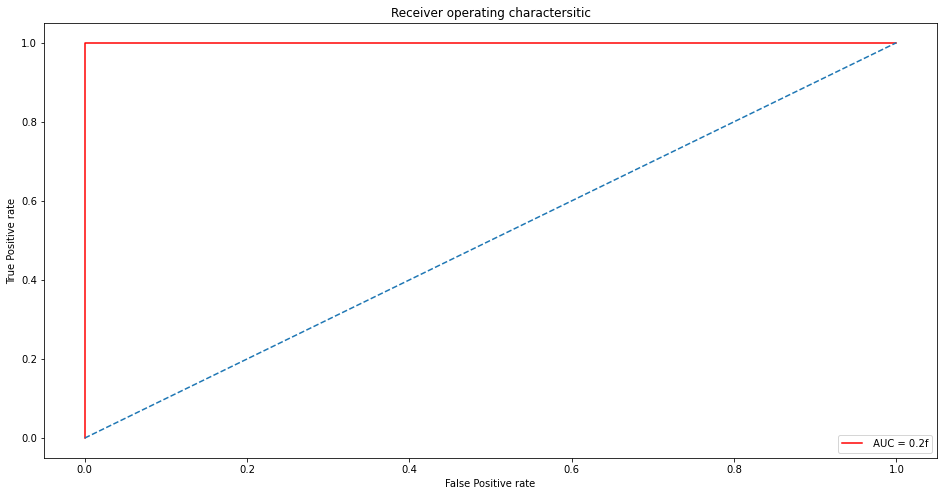

In [48]:
def plot_roc(roc_auc):
    plt.figure(figsize=(16,8))
    plt.title('Receiver operating charactersitic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label=' AUC = 0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive rate')
    plt.xlabel('False Positive rate')

    
plot_roc(roc_auc)
    


###linear discriminant analysis


In [43]:
from sklearn .discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
y_prob_lda = lda.predict_proba(X_test) [:, 1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)

In [46]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [47]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

1.0

Plot Using the function You can use quadratic discriminant analysis the same way as above
from sklearn.discriminant analysis import QuadraticDiscriminantAnalysis

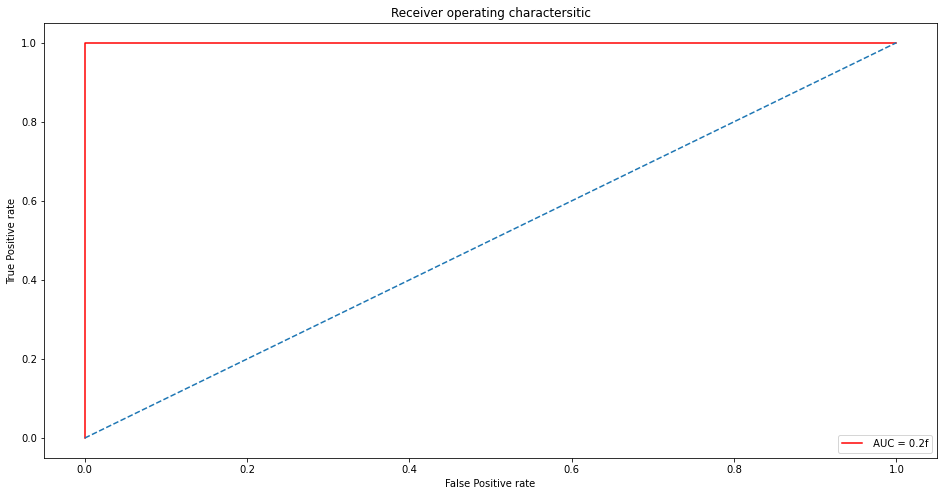

In [50]:
plot_roc(roc_auc_lda)

In [51]:
ad_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


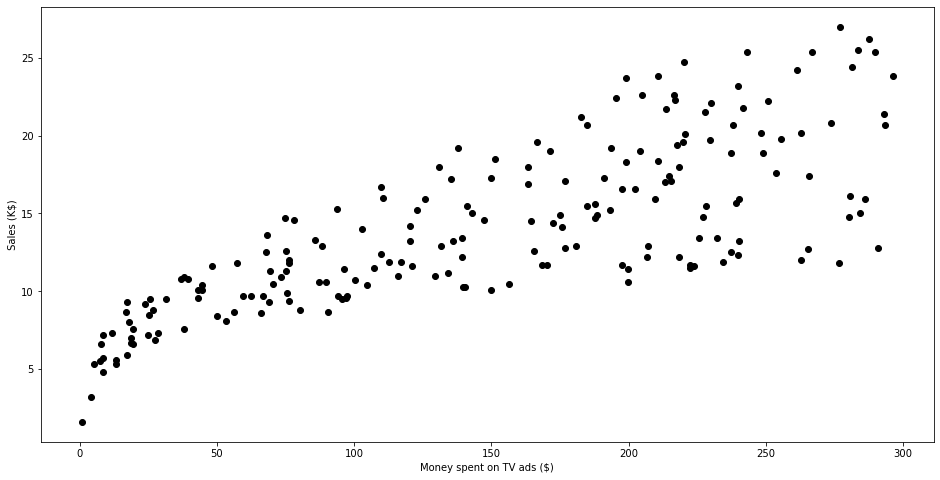

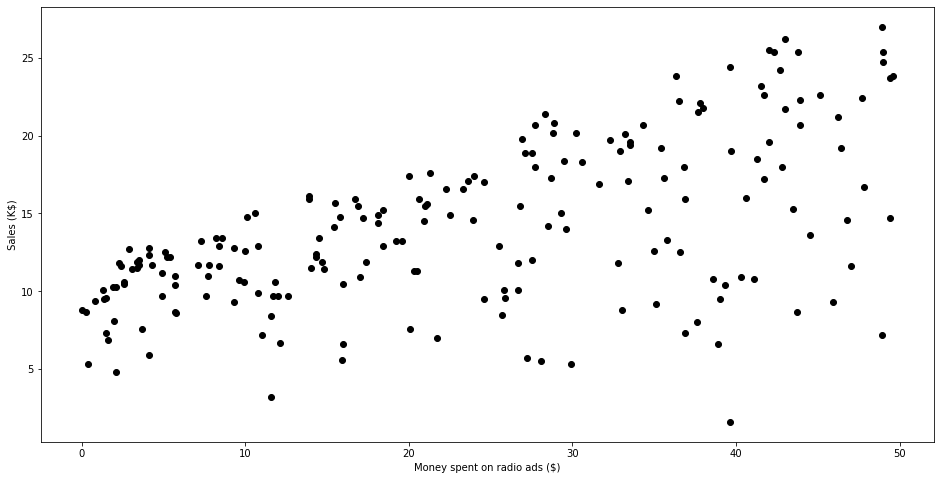

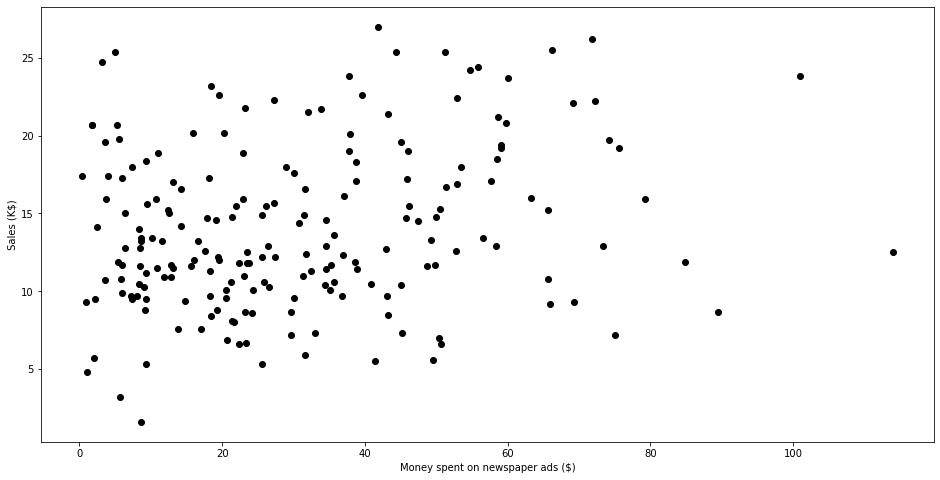

In [59]:
#plot the target sales against the features Tv, radio and newspaper
def scatter_plot(feature):
    plt.figure(figsize=(16,8))
    plt.scatter(ad_df[feature], ad_df['sales'], c='black')
    plt.xlabel(f"Money spent on {feature} ads ($)")
    plt.ylabel(f" Sales (K$) ")
    
    
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

In [60]:
#baseline for cross validation
from sklearn.model_selection import cross_val_score

In [61]:
X = ad_df.drop(['sales'], axis=1)
y = ad_df['sales'].values.reshape(-1,1)

In [62]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print(-mean_MSE)

3.07294659710021


In [63]:
#regularization through ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [66]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y);
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.072671338341143


In [70]:
#using the lasso model
from sklearn.linear_model import Lasso


In [72]:
lasso = Lasso(tol=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X, y);
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_) #produces the best score

{'alpha': 1}
3.035998320911192


In [74]:
#decision trees
bc_df = pd.read_csv('breastCancer.csv')
bc_df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


<AxesSubplot:xlabel='Classification', ylabel='count'>

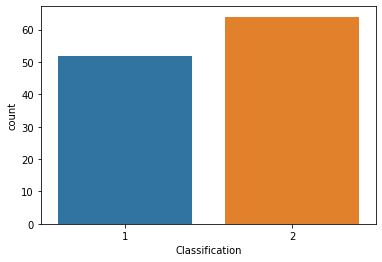

In [82]:
sns.countplot(x='Classification', data=bc_df)

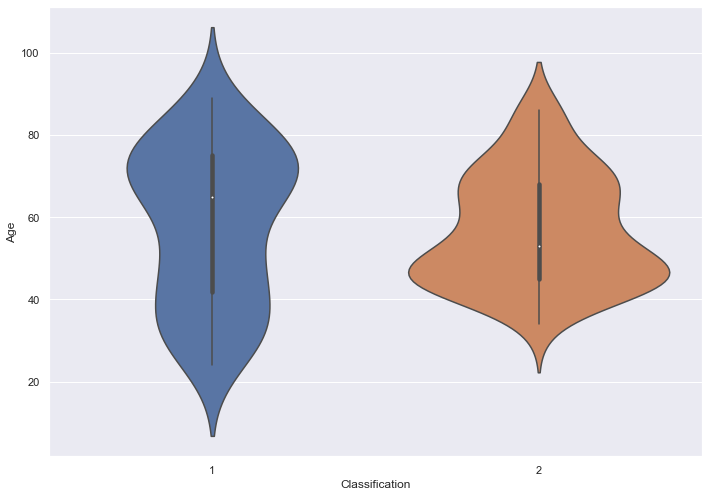

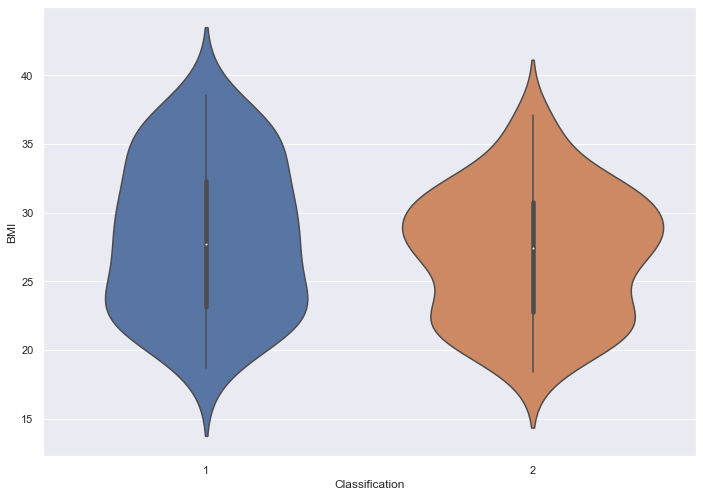

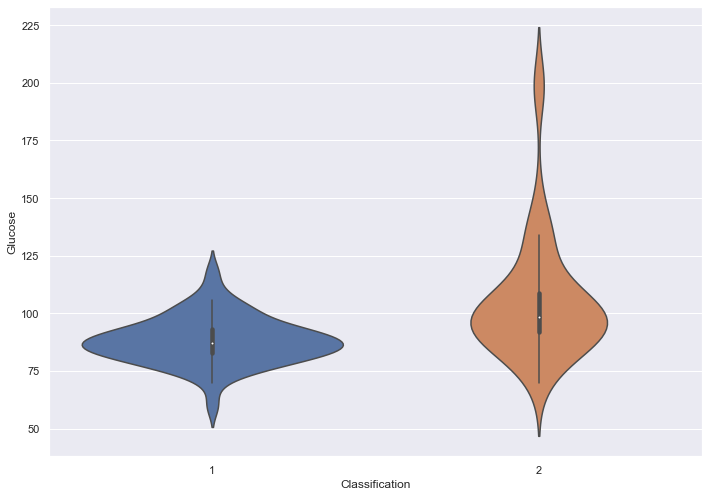

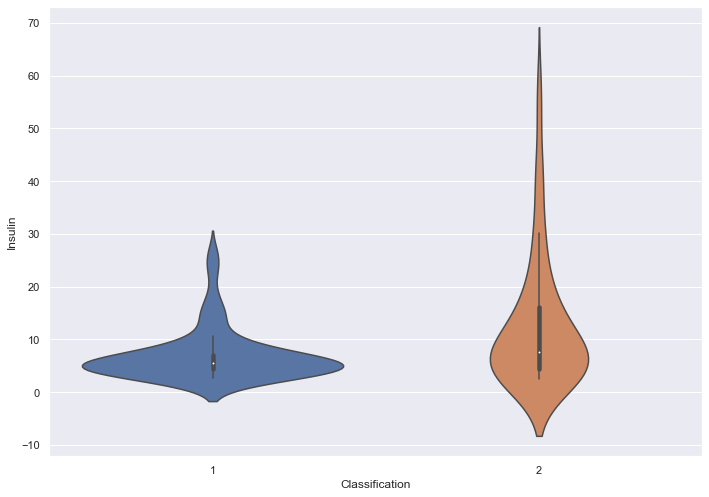

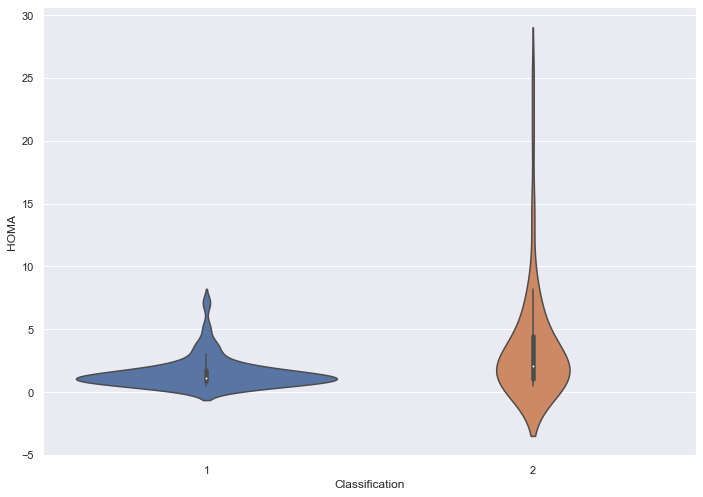

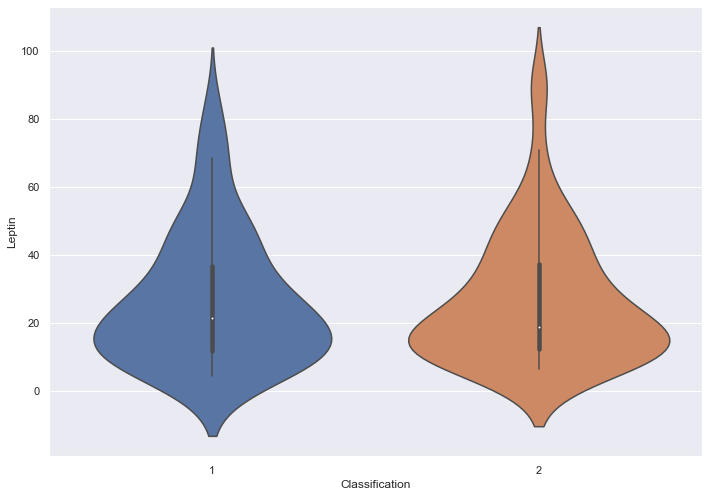

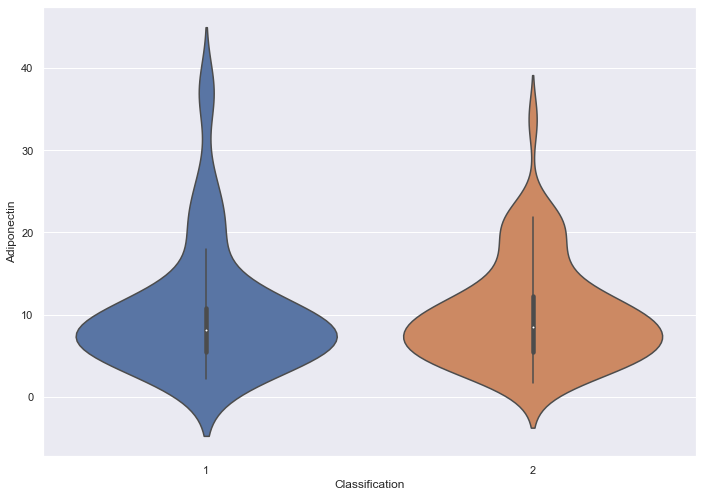

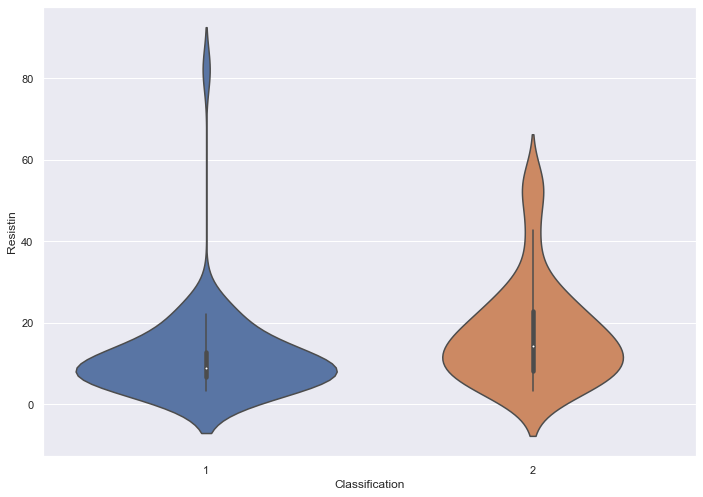

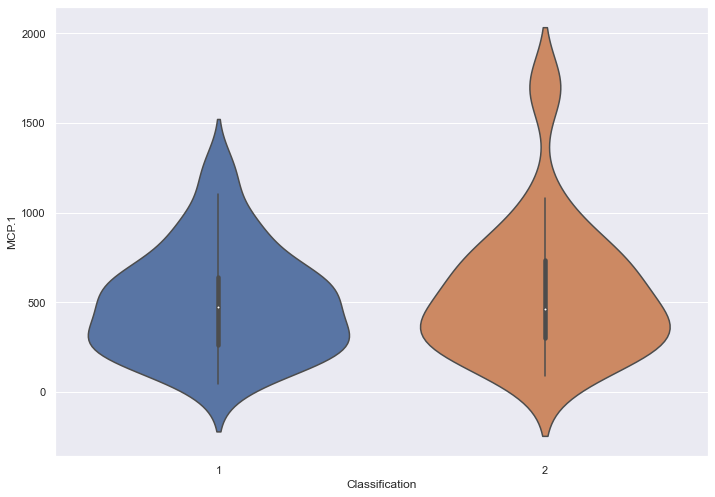

In [84]:
#violin plot for the distribution
def violin_plots(x, y, bc_df):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize': (11.7, 8.27)})
        ax = sns.violinplot(x=x, y=col, data=bc_df)
        
y = bc_df.columns[:-1]
x = bc_df.columns[-1]
violin_plots(x, y, bc_df)

In [86]:
# check for null values
for col in bc_df.columns:
    print(f'{col}: {bc_df[col].isnull().sum()}')

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


In [88]:
bc_df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [100]:
#use the label encoder on the classification to 0,1
le = LabelEncoder()
bc_df['Classification'] = le.fit_transform(bc_df['Classification'])
bc_df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


The above labels for 0 one is healthy, for 1 they have breast cancer.

In [101]:
y = bc_df['Classification'].values.reshape(-1, 1)
X = bc_df.drop(['Classification'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree# to simply plot a decision tree.
  

[Text(433.99999999999994, 398.64, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(272.79999999999995, 326.15999999999997, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(223.2, 253.67999999999998, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(322.4, 253.67999999999998, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(198.39999999999998, 181.2, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(99.19999999999999, 108.71999999999997, 'X[1] <= 29.623\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(49.599999999999994, 36.23999999999995, '\n  (...)  \n'),
 Text(148.79999999999998, 36.23999999999995, '\n  (...)  \n'),
 Text(297.59999999999997, 108.71999999999997, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(247.99999999999997, 36.23999999999995, '\n  (...)  \n'),
 Text(347.19999999999993, 36.23999999999995, '\n  (...)  \n'),
 Text(446.4, 181.2, 'X[1] <= 31.124\ngini = 0.26\nsample

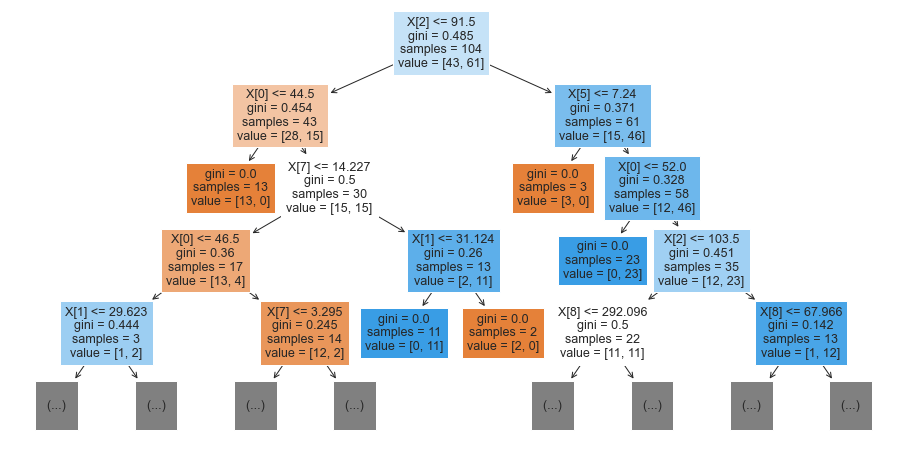

In [112]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(16,8))

plot_tree(clf, max_depth=4, filled=True)



In [127]:
#bagging 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier

<function matplotlib.pyplot.show(close=None, block=None)>

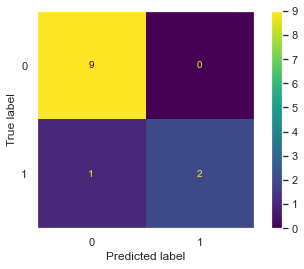

In [130]:
random_clf = RandomForestClassifier(100)
random_clf.fit(X_train, y_train.ravel())
plot_confusion_matrix(random_clf, X_test, y_test)
plt.grid(False)
plt.show

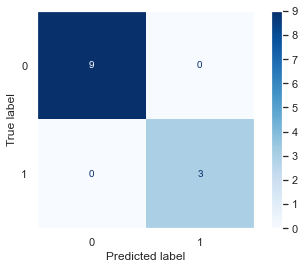

In [128]:
bagging_clf = BaggingClassifier()
bagging_clf.fit(X_train, y_train.ravel())
plot_confusion_matrix(bagging_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [131]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier 

<function matplotlib.pyplot.show(close=None, block=None)>

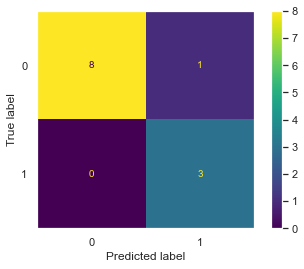

In [132]:
boost_clf = GradientBoostingClassifier()
boost_clf.fit(X_train, y_train.ravel())
plot_confusion_matrix(boost_clf, X_test, y_test,)
plt.grid(False)
plt.show

In [133]:
import matplotlib.cm as cm
from scipy.io import loadmat

In [136]:
DATAPATH_1 = ('ex6data1.mat')
DATAPATH_2 = ('ex6data2.mat')
DATAPATH_3 = ('ex6data3.mat')
DATA_SPAM_TRAIN = ('spamTest.mat')
DATA_SPAM_TEST = ('spamTrain.mat')

In [142]:
def plot_data(X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes=None):
    plt.rcParams['figure.figsize'] = (20., 14.)
    pos = y[:, 0]==1
    neg = y[:, 0]==0
    if axes == None:
        axes = plt.gca()
    axes.scatter(X[pos][:,0], X[pos][:,1], marker='o', c='red', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,0], X[neg][:,1], marker='o', c='black', s=50, linewidth=2, label=neg_label)
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])
    axes.set_xlabel(xlabel, fontsize=12)
    axes.set_ylabel(ylabel, fontsize=12)
    axes.legend(bbox_to_anchor=(1,1), fancybox=True)
    
        

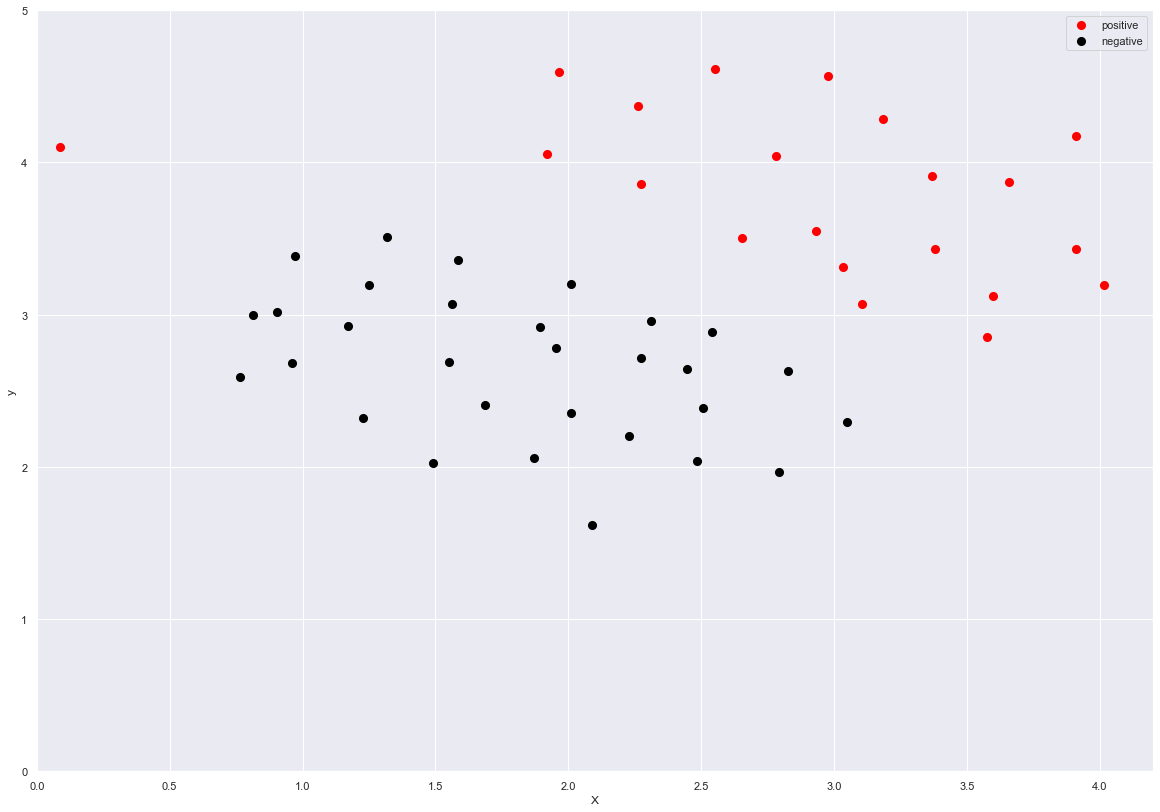

In [143]:
#svm regularization
data1 = loadmat(DATAPATH_1)

X = data1['X']
y = data1['y']

plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

In [146]:
from sklearn import svm

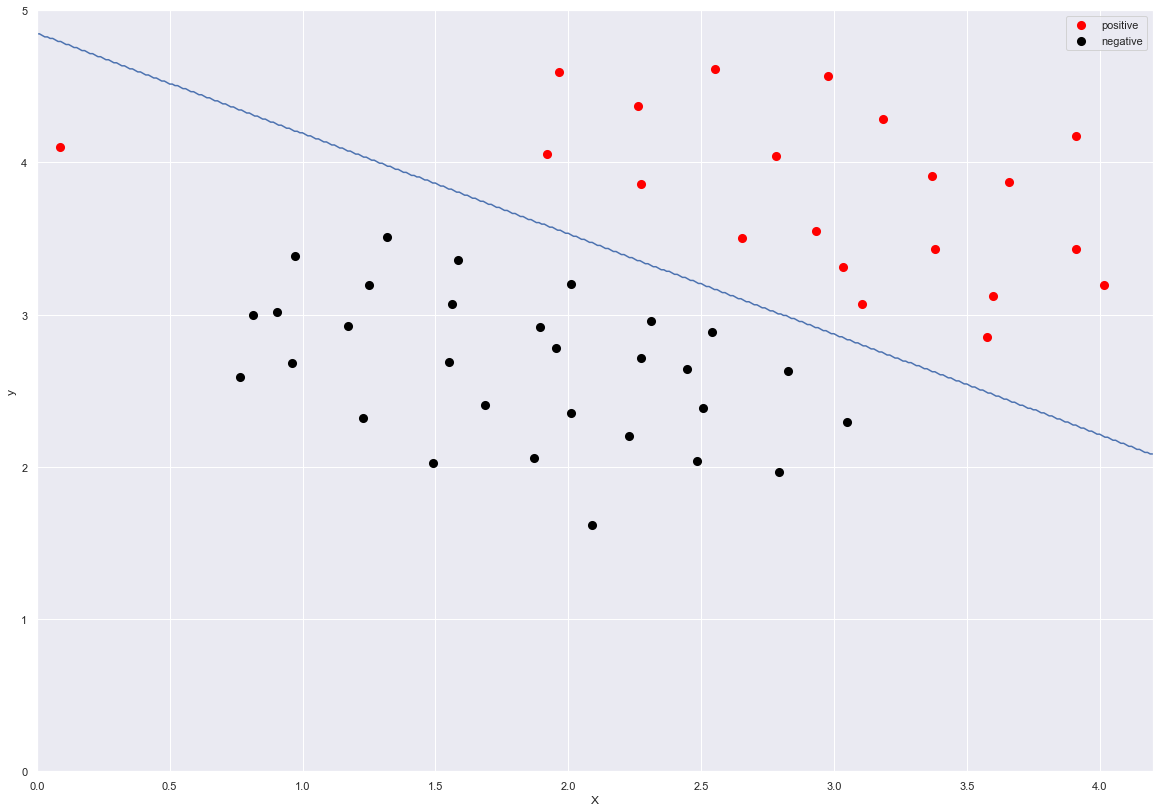

In [149]:
#to use svm to check out the outlier, for a smaller value regularization parameter set to 1

clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

#plot the data 
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#the boundary on top/hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors='b')


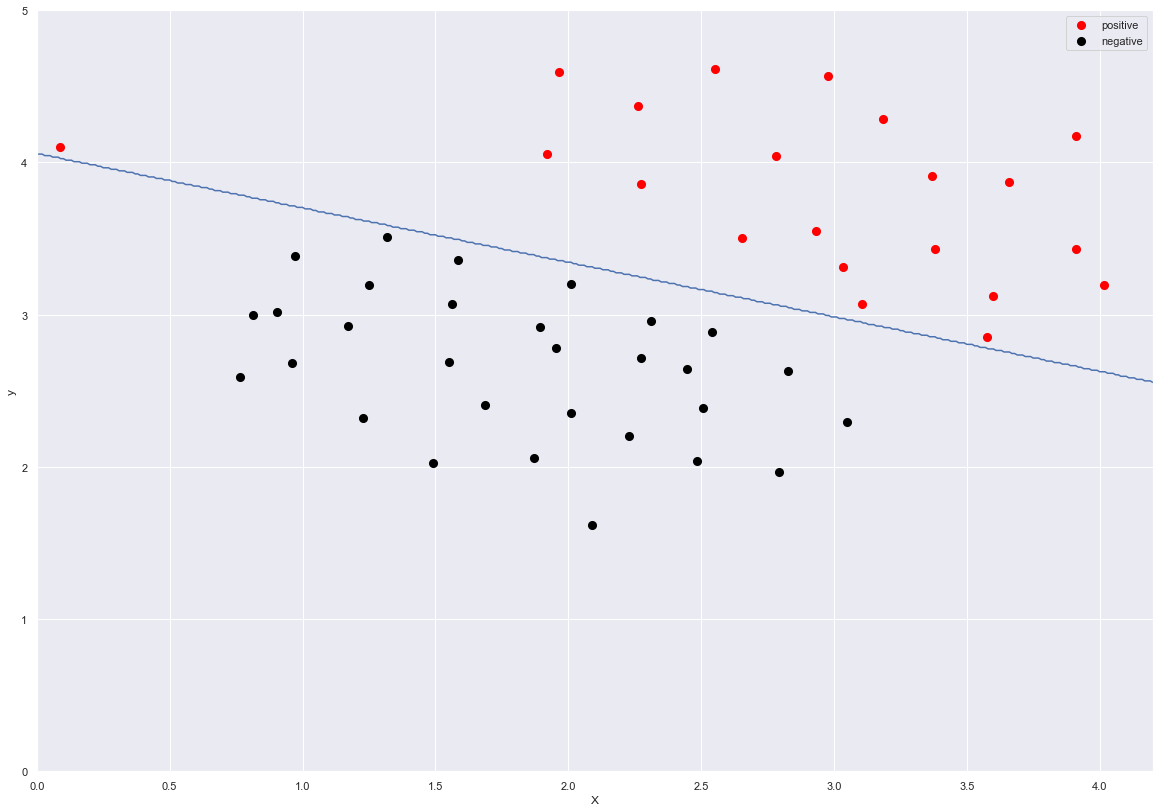

In [150]:
#svm with a large regularization parameter
clf = svm.SVC(kernel='linear', C=100.0, decision_function_shape='ovr')
clf.fit(X, y.ravel())

#plot the data 
plot_data(X, y, 'X', 'y', 'positive', 'negative', 0, 4.2, 0, 5)

#the boundary on top/hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 5.0, 0.01), np.arange(0.0, 5.0, 0.01))
z = clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors='b')


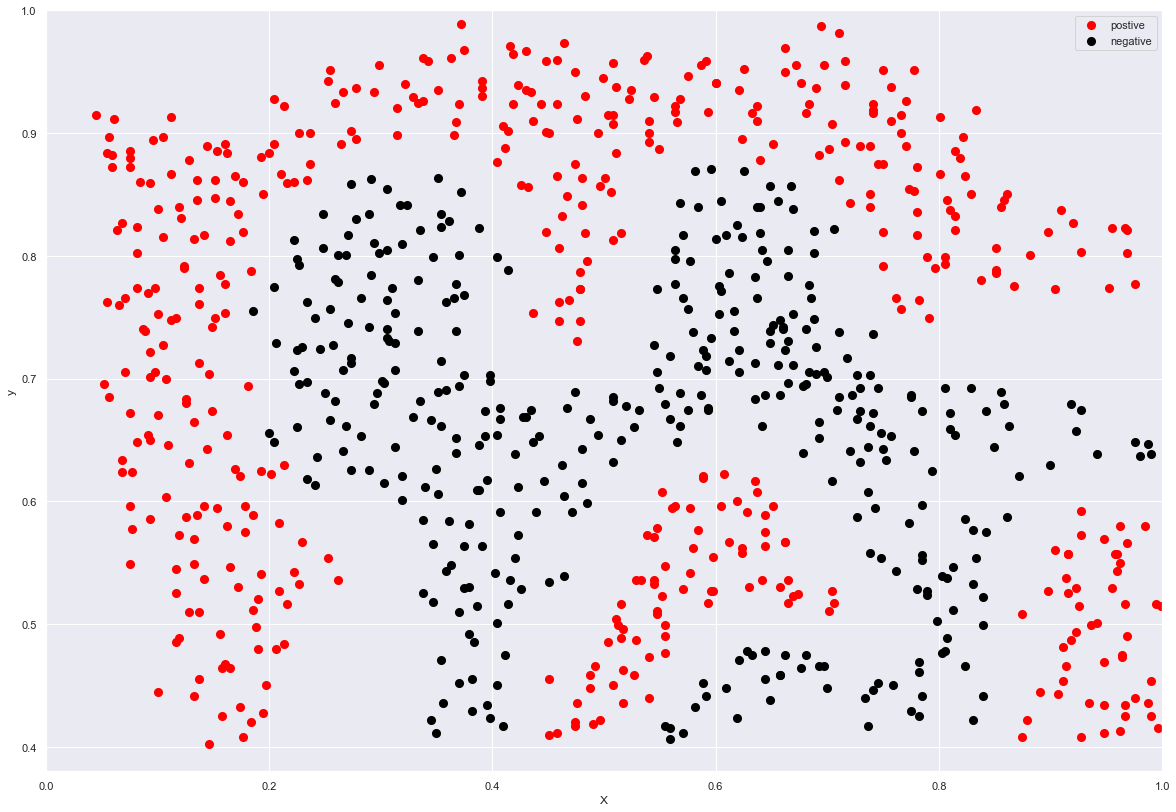

In [159]:
#svm with non-linear boundary
data2 = loadmat(DATAPATH_2)

X_2  = data2['X']
y_2= data2['y']

plot_data(X, y, 'X', 'y', 'postive', 'negative', 0, 1.0, 0.38, 1.0)

#using a radio basis function for the kernel and define sigma and 
#gamma a parameter that specifies where the influence of a data point reaches.Low value means very far
#a high value means very near or close



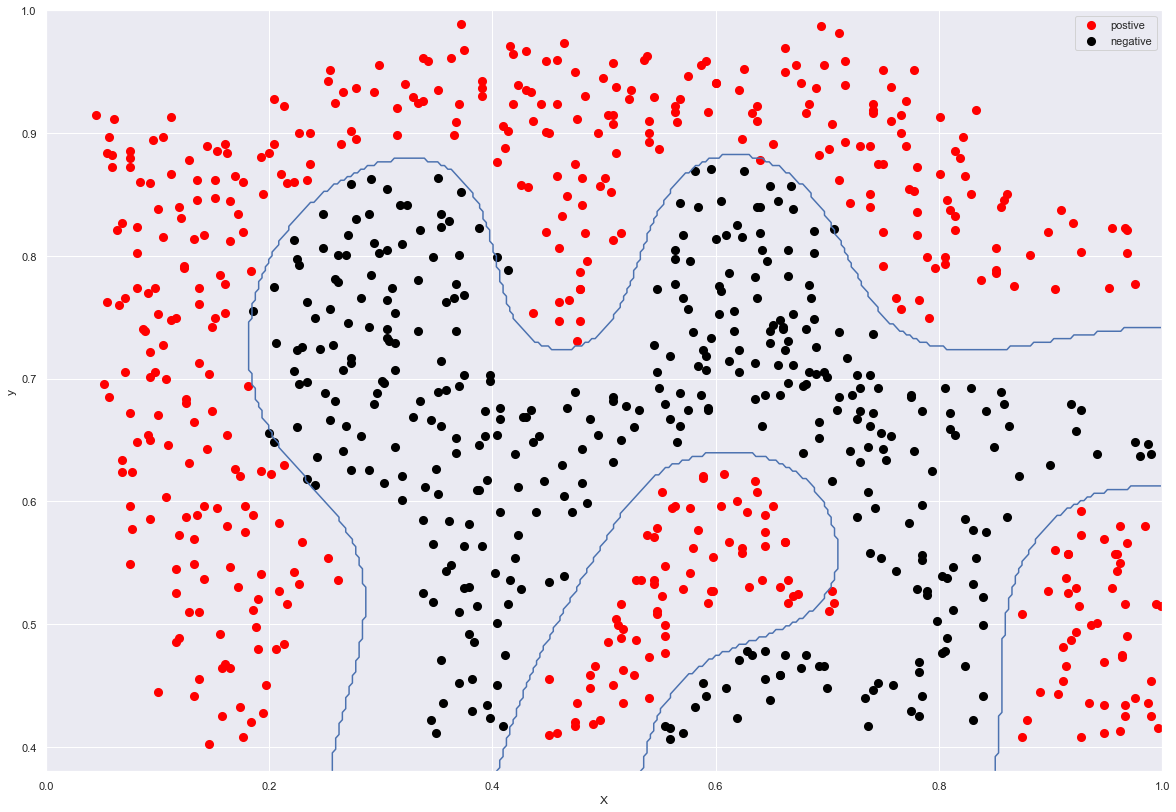

In [160]:
sigma = 0.1
gamma = 1/(2 * sigma**2)
#fit the model
clfg = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')
#fit the data
clfg.fit(X_2, y_2.ravel())
#plot the data
plot_data(X, y, 'X', 'y', 'postive', 'negative', 0, 1.0, 0.38, 1.0)
#plot the hyperplane
x_1, x_2 = np.meshgrid(np.arange(0.0, 1.0, 0.003 ), np.arange(0.38, 1.0, 0.003))
z = z = clfg.predict(np.c_[x_1.ravel(), x_2.ravel()])
z = z.reshape(x_1.shape)
plt.contour(x_1, x_2, z, [0.5], colors='b')

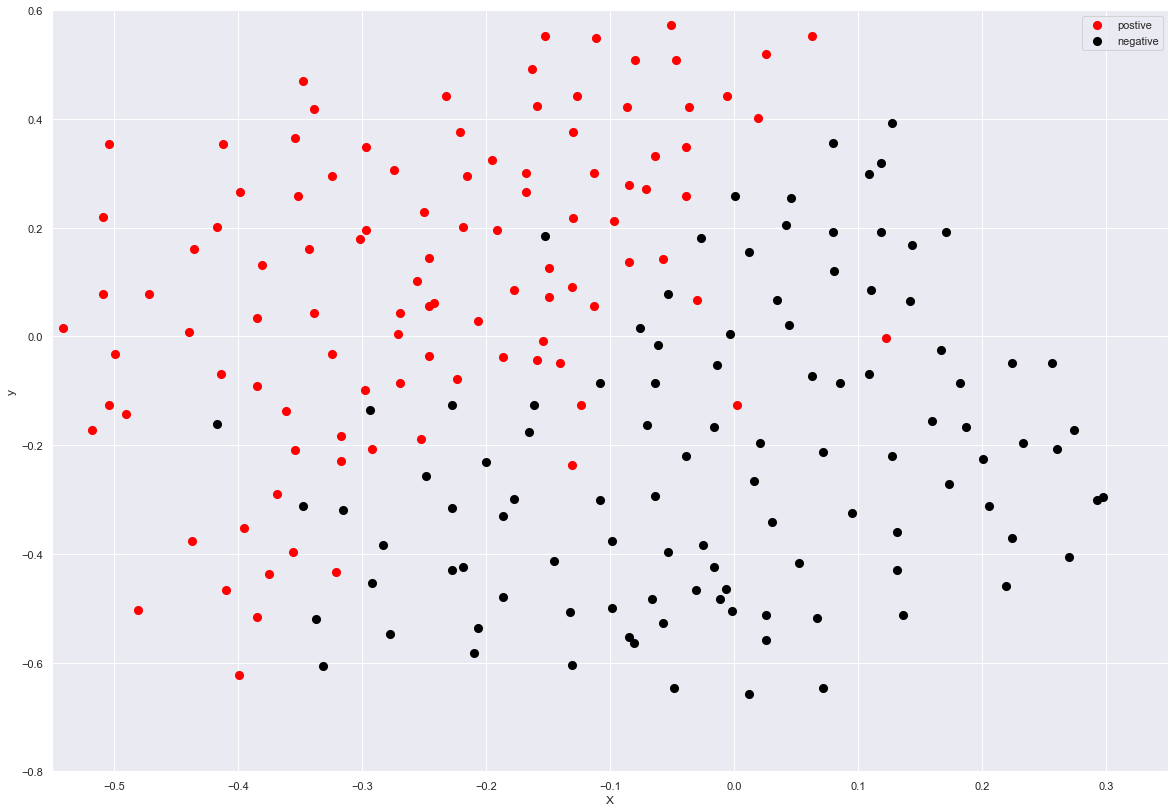

In [165]:
#classification with cross validation where data is not easily separable
data3 = loadmat(DATAPATH_3)
X_3 = data3['X']
y_3 = data3['y']

plot_data(X_3, y_3, 'X', 'y', 'postive', 'negative', -0.55, 0.35, -0.8, 0.6)

In [168]:
sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

errors = list()
sigma_c = list()
for each in sigma:
    for each_c in C:
        clf = svm.SVC(kernel='rbf', gamma=1/(2*(each**2)), C=each_c, decision_function_shape='ovr')
        clf.fit(X_3, y_3.ravel())
        errors.append(clf.score(data3['Xval'], data3['yval'].ravel()))
        sigma_c.append((each, each_c))

In [169]:
index = np.argmax(errors)
sigma_max, c_max = sigma_c[index]
print(f'The optimal value of sigma is: {sigma_max}')
print(f'The optimal value of C is: {c_max}')

The optimal value of sigma is: 0.1
The optimal value of C is: 1


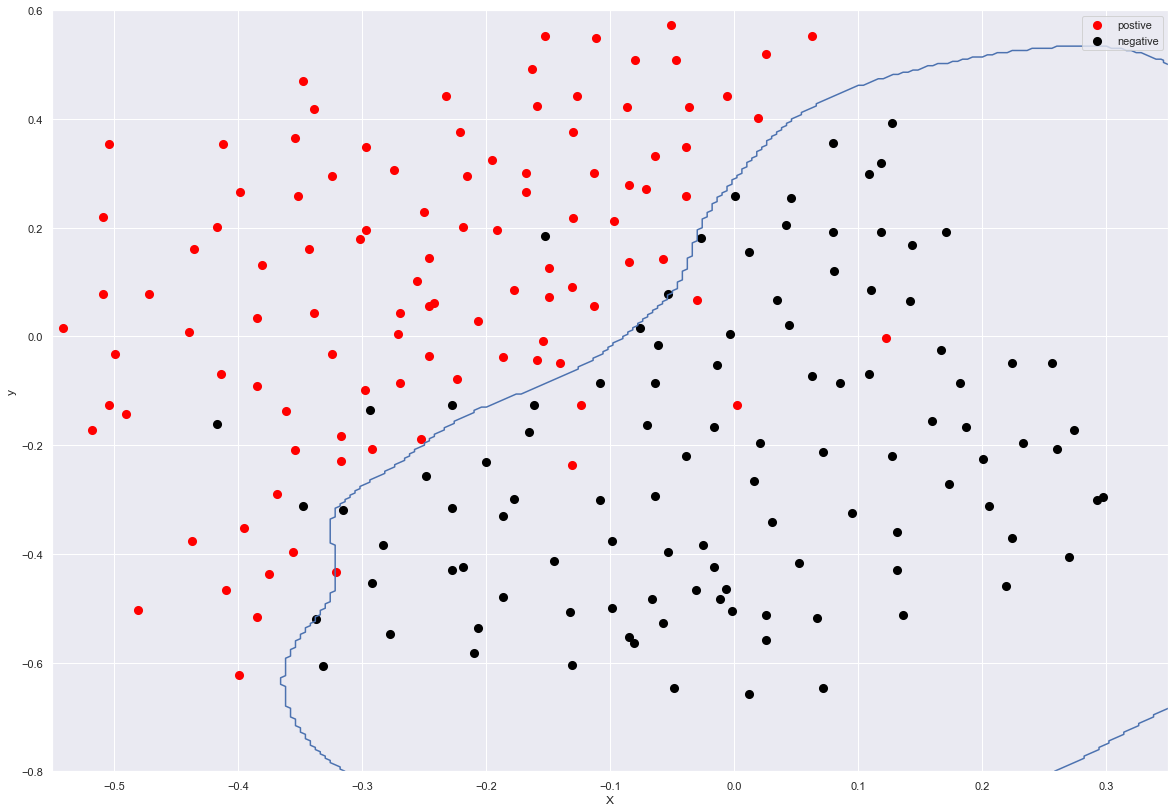

In [172]:
# we go ahead and fit the svm algorithm
sigma = 0.1
gamma = 1/(2*sigma**2)

optimal_clf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0, decision_function_shape='ovr')#initialize alg
optimal_clf.fit(X_3, y_3.ravel())#fit in data

plot_data(X_3, y_3, 'X', 'y', 'postive', 'negative', -0.55, 0.35, -0.8, 0.6)#plot data

#find boundaries and plot boundary.
x_1, x_2 = np.meshgrid(np.arange(-0.6, 0.4, 0.004 ), np.arange(-0.8, 0.6, 0.004))
Z = optimal_clf.predict(np.c_[x_1.ravel(), x_2.ravel()])
Z = Z.reshape(x_1.shape)
plt.contour(x_1, x_2, Z, [0.5], colors='b')


In [184]:
spam_train = loadmat(DATA_SPAM_TRAIN)
spam_test = loadmat(DATA_SPAM_TEST)

In [191]:
#spam classification

#set regularization parameter to 0.1
X_test = spam_test['Xtest']
y_test = spam_test['ytest']

X_train = spam_train['X']
y_train = spam_train['y']



clf_spam = svm.SVC(kernel='linear', C=0.1, decision_function_shape='ovr')
clf_spam.fit(X_train, y_train.ravel())

train_acc = clf_spam.score(spam_train['X'], spam_train['y'].ravel())
test_acc = clf_spam.score(X_test, y_test.ravel())

print(f'Training accuracy is: {train_acc * 100}')
print(f'Testing accuracy is: {test_acc * 100}')


KeyError: 'Xtest'

In [192]:
from sklearn.utils import shuffle

In [193]:
#clustering by K-means 
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

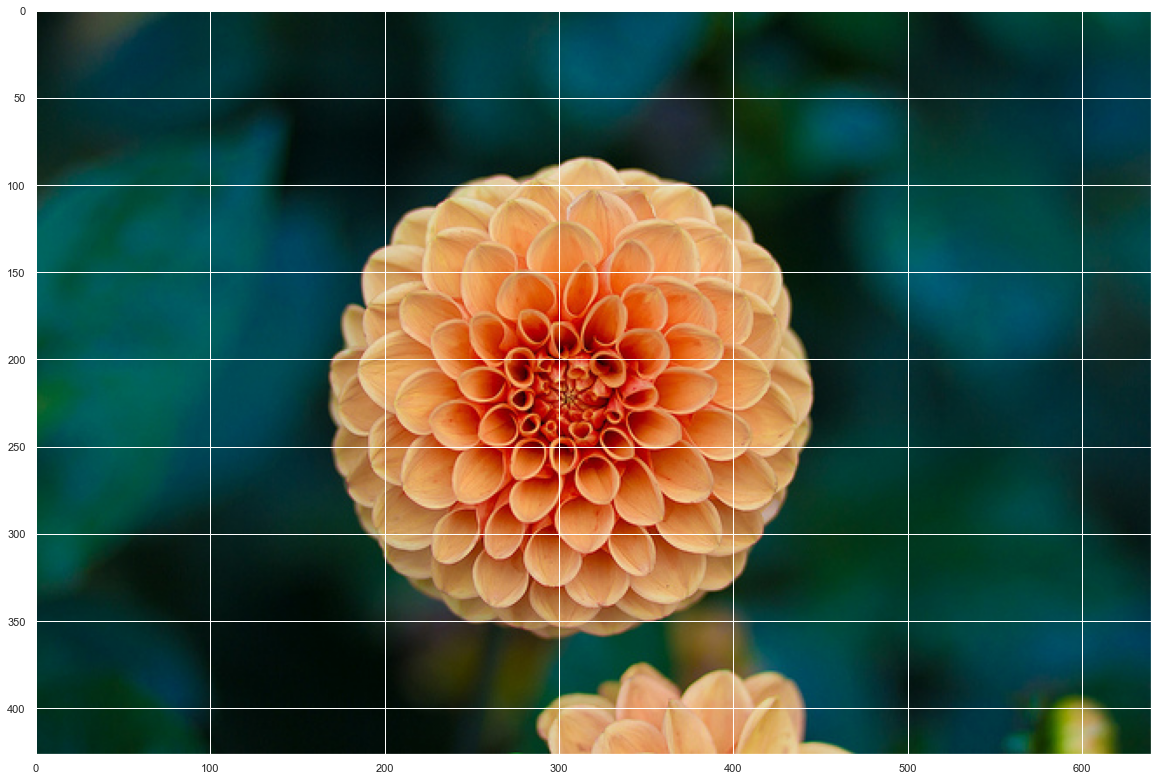

In [194]:
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower)

In [197]:
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w*h, d))

In [202]:
image_sample = shuffle(image_array, random_state=42) [:1000]

 #fit the KMeans algorithm
n_colors = 4
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

#get color indices for full image
labels = kmeans.predict(image_array)

In [203]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image
        
    

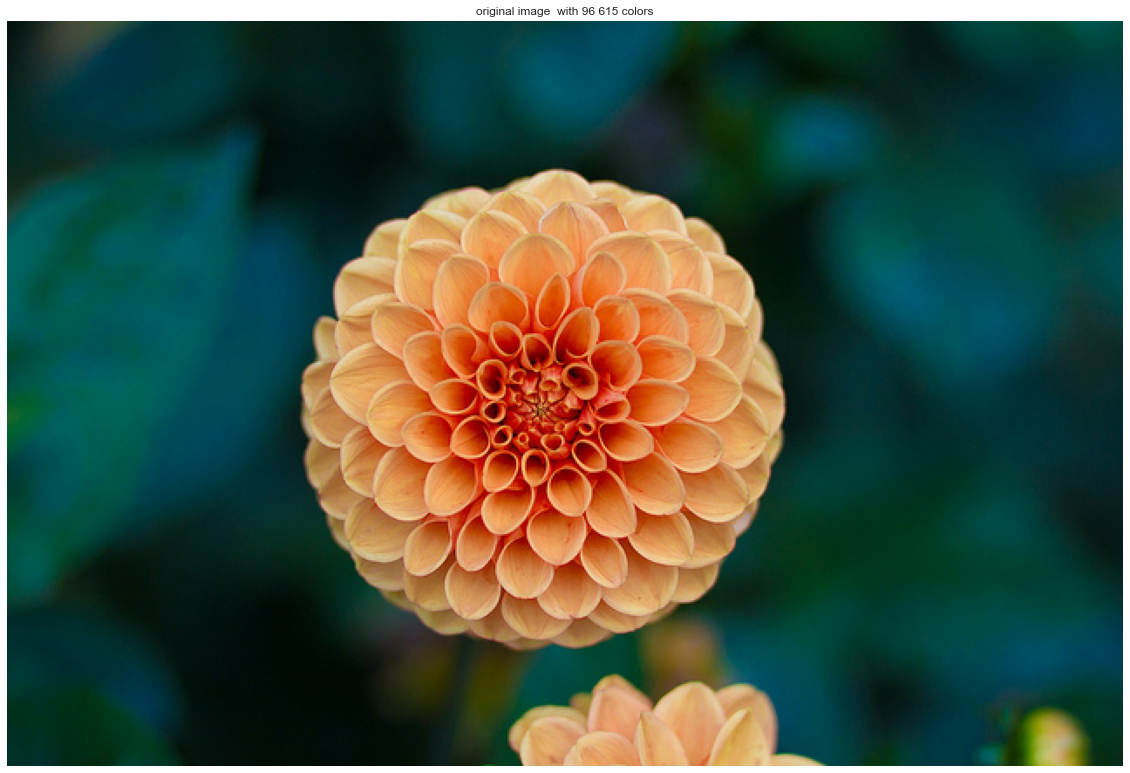

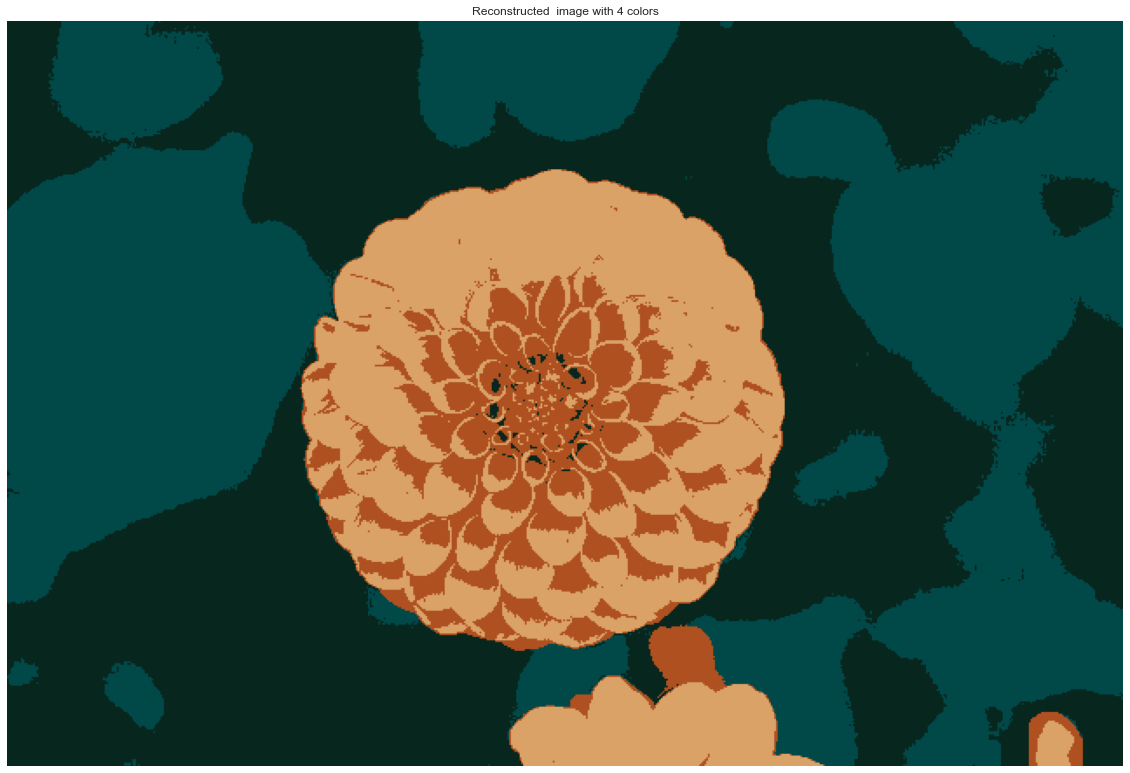

In [204]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('original image  with 96 615 colors')
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed  image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

In [211]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [212]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [213]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

#print out the amount of variance that is explained by each principal component
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')#below it means 97% of the two components.

Explained variance ratio from PCA: [0.92461872 0.05306648]


In [214]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw=2

Text(0.5, 1.0, 'PCA of Iris Dataset ')

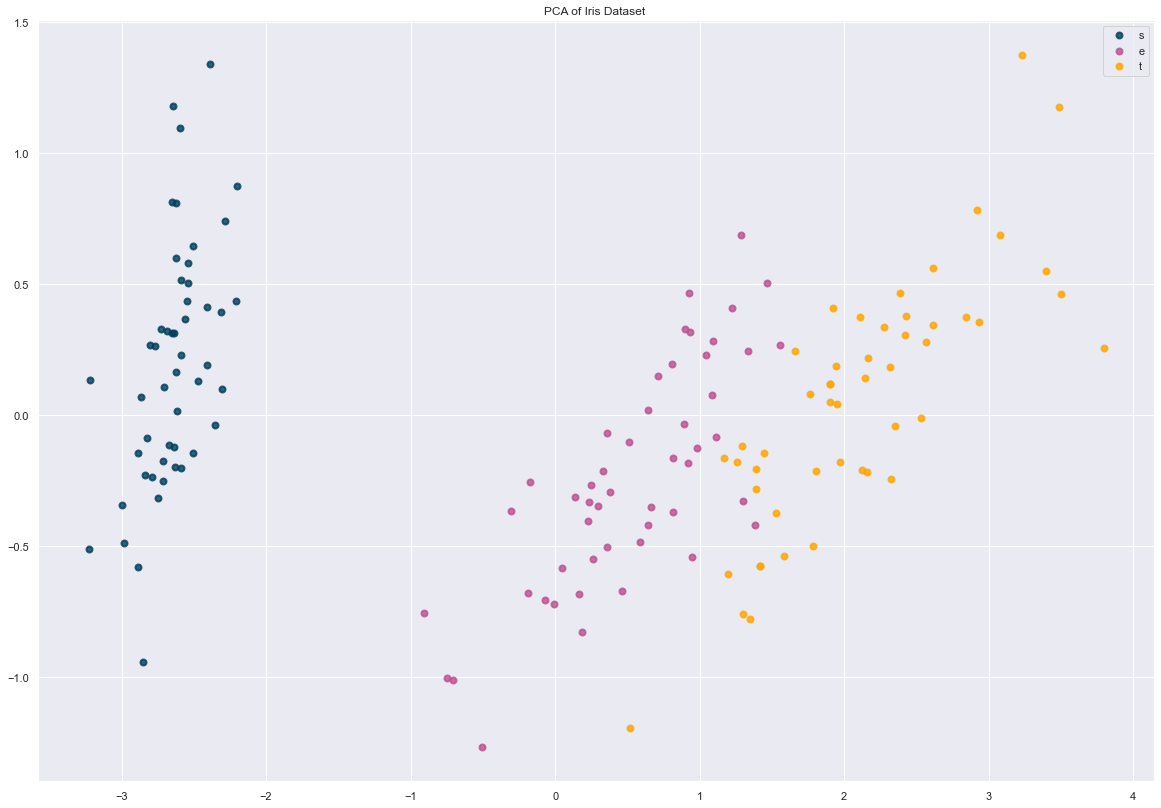

In [216]:
plt.figure()

for color, i, target_names in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_names)

    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris Dataset ')